# Working With Pandas And Matplotlib

This problem gives you an intro to doing Data Analysis with Pandas. The question is kept sligtly open ended on in the sense that we have not provided the exact steps you should take to arrive at the answers on purpose. You can refer to the tutorial provided to you earlier for inspiration. You should arrive at all the answers by writing appropriate code, eye-balling the data and reporting answers is not allowed. 

You are given [2011 Census Data](./NDAP_REPORT_6000.csv). Your task is to clean the data and perform the perform the following tasks:

---

## Task 1

1. Show how literacy rate for males, females, and the total population differs between urban and rural areas within each state.
2. Which state has the highest disparity between urban and rural areas?
3. Also plot 2 graphs for male and female population showing combined literacy rates for each state

## Task 2

1. What is the distribution of the working population (main and marginal workers) by sector (cultivators, agricultural labourers, household industry, other workers) and gender across different states?
2. Plot a graph showing all these sectors together for top 5 states ranked by employment rate.
<br>
<br>
---

You can also plot other graphs if needed or carry out other data analysis.


In [1]:
import pandas as pd
from matplotlib import pyplot as plt

In [2]:
data = pd.read_csv('NDAP_REPORT_6000.csv')


In [3]:
data.columns = data.columns.str.strip()


In [4]:
data.columns = data.columns.str.lower().str.replace(' ', '_')

In [5]:
rural = data[data['rural_or_urban'] == 'Rural']
urban = data[data['rural_or_urban'] == 'Urban']

In [6]:
cols_to_sum = [
    'male_population',
    'female_population',
    'male_literate_population',
    'female_literate_population'
]

rural = (
     rural
    .groupby('state', as_index=False)[cols_to_sum]
    .sum()
)

urban = (
     urban
    .groupby('state', as_index=False)[cols_to_sum]
    .sum()
)


In [7]:
print(rural.columns)


Index(['state', 'male_population', 'female_population',
       'male_literate_population', 'female_literate_population'],
      dtype='object')


In [8]:
rural

,state,male_population,female_population,male_literate_population,female_literate_population
0,ANDAMAN AND NICOBAR ISLANDS,126287,110806,99960,78065
1,ANDHRA PRADESH,17538248,17428445,10991426,8457565
2,ARUNACHAL PRADESH,546011,520347,309390,226512
3,ASSAM,13678989,13128045,8706193,6979243
4,BIHAR,48073850,44267586,27241830,17570322
5,CHANDIGARH,17150,11841,12752,7209
6,CHHATTISGARH,9797426,9810535,6403012,4605944
7,DELHI,226321,192721,174327,122273
8,GOA,275436,276295,227143,204128
9,GUJARAT,17799159,16895450,12467643,8953199


In [9]:
rural['male_lit_pct'] = rural['male_literate_population'] / rural['male_population'] * 100
urban['male_lit_pct'] = urban['male_literate_population'] / urban['male_population'] * 100
rural['female_lit_pct'] = rural['female_literate_population'] / rural['female_population'] * 100
urban['female_lit_pct'] = urban['female_literate_population'] / urban['female_population'] * 100

In [10]:
statewise = rural.merge(urban, on='state', suffixes=('_rural', '_urban'))

In [11]:
statewise['diff_urban']=statewise['male_lit_pct_urban']-statewise['female_lit_pct_urban']
statewise['diff_rural']=statewise['male_lit_pct_rural']-statewise['female_lit_pct_rural']

In [12]:
statewise

,state,male_population_rural,female_population_rural,male_literate_population_rural,female_literate_population_rural,male_lit_pct_rural,female_lit_pct_rural,male_population_urban,female_population_urban,male_literate_population_urban,female_literate_population_urban,male_lit_pct_urban,female_lit_pct_urban,diff_urban,diff_rural
0,ANDAMAN AND NICOBAR ISLANDS,126287,110806,99960,78065,79.153040,70.451961,76584,66904,64417,51839,84.112870,77.482662,6.630208,8.701079
1,ANDHRA PRADESH,17538248,17428445,10991426,8457565,62.671174,48.527364,7292265,7318145,5558088,4852903,76.218953,66.313294,9.905659,14.143810
2,ARUNACHAL PRADESH,546011,520347,309390,226512,56.663694,43.530951,167901,149468,130478,99625,77.711270,66.653063,11.058207,13.132742
3,ASSAM,13678989,13128045,8706193,6979243,63.646465,53.162851,2260454,2138088,1862446,1630095,82.392564,76.240781,6.151782,10.483614
4,BIHAR,48073850,44267586,27241830,17570322,56.666629,39.691168,6204307,5553709,4366193,3326208,70.373581,59.891651,10.481930,16.975460
5,CHANDIGARH,17150,11841,12752,7209,74.355685,60.881682,563513,462946,452594,332883,80.316514,71.905363,8.411152,13.474003
6,CHHATTISGARH,9797426,9810535,6403012,4605944,65.354023,46.948958,3035469,2901768,2404881,1966085,79.226011,67.754727,11.471283,18.405064
7,DELHI,226321,192721,174327,122273,77.026436,63.445603,8761005,7607894,7020529,5420638,80.133832,71.250178,8.883654,13.580833
8,GOA,275436,276295,227143,204128,82.466707,73.880454,463704,443110,388680,345536,83.820713,77.979734,5.840979,8.586253
9,GUJARAT,17799159,16895450,12467643,8953199,70.046248,52.991776,13693814,12054660,11008603,8666229,80.391066,71.891111,8.499955,17.054472


In [13]:
statewise[['state', 'diff_urban']].sort_values(
'diff_urban', ascending=False
).head(5)

,state,diff_urban
16,LADAKH,21.943002
27,RAJASTHAN,14.468021
12,JAMMU AND KASHMIR,12.942034
31,THE DADRA AND NAGAR HAVELI AND DAMAN AND DIU,12.647557
6,CHHATTISGARH,11.471283


In [14]:
statewise[['state', 'diff_rural']].sort_values(
'diff_rural', ascending=False
).head(5)

,state,diff_rural
27,RAJASTHAN,24.965044
16,LADAKH,23.294546
31,THE DADRA AND NAGAR HAVELI AND DAMAN AND DIU,21.864706
13,JHARKHAND,19.733446
33,UTTAR PRADESH,18.887723


<Axes: >

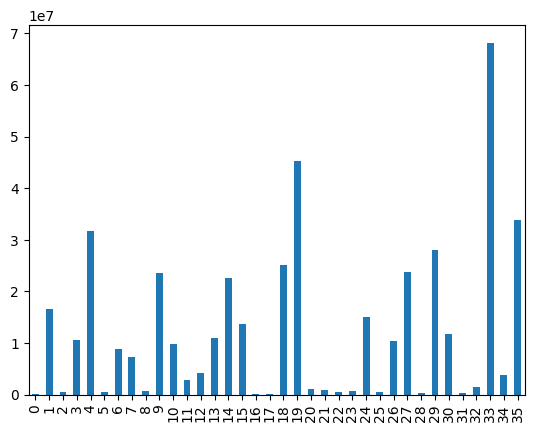

In [15]:
(statewise['male_literate_population_rural']+statewise['male_literate_population_urban']).plot(kind="bar")

<Axes: >

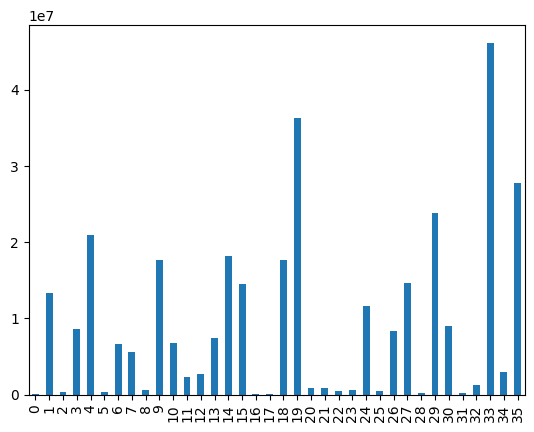

In [16]:
(statewise['female_literate_population_urban']+statewise['female_literate_population_rural']).plot(kind="bar")

In [17]:
#task 2

In [18]:
print(data.columns)

Index(['rowid', 'country', 'state_lgd_code', 'state', 'district_lgd_code',
       'district', 'sub-district_lgd_code', 'sub-district',
       'ulb_rlb_village_lgd_code', 'ulb_rlb_village', 'rural_or_urban',
       'households', 'population', 'male_population', 'female_population',
       'population_in_the_age_group_0_to_6_years',
       'male_population_in_the_age_group_0_to_6_years',
       'female_population_in_the_age_group_0_to_6_years',
       'scheduled_caste_population', 'male_scheduled_caste_population',
       'female_scheduled_caste_population', 'scheduled_tribe_population',
       'male_scheduled_tribe_population', 'female_scheduled_tribe_population',
       'literate_population', 'male_literate_population',
       'female_literate_population', 'illiterate_population',
       'male_illiterate_population', 'female_illiterate_population',
       'working_population', 'male_working_population',
       'female_woking_population', 'number_of_main_workers',
       'number_of_male

In [19]:
data['male_cultivators']=data['number_of_male_main_workers_as_cultivators']+data['number_of_male_marginal_workers_as_cultivators']
data['female_cultivators'] = (data["number_of_female_main_workers_as_cultivators"] +data["number_of_female_marginal_workers_as_cultivators"])

data["male_agri_labour"] = (
    data["number_of_male_main_workers_as_agricultural_labourers"] +
    data["number_of_male_marginal_workers_as_agricultural_labourers"] )
data["female_agri_labour"] = (
    data["number_of_female_main_workers_as_agricultural_labourers"] +
    data["number_of_female_marginal_workers_as_agricultural_labourers"])
data["male_household_industry"] = (
    data["number_of_male_main_workers_in_the_household_industry"] +
    data["number_of_male_marginal_workers_in_the_household_industry"]
)    
data["female_household_industry"] = (
    data["number_of_female_main_workers_in_the_household_industry"] +
    data["number_of_female_marginal_workers_in_the_household_industry"]
)
data["male_other_workers"] = (
    data["number_of_male_main_workers_as_other_workers"] +
    data["number_of_male_marginal_workers_as_other_workers"]
)

data["female_other_workers"] = (
    data["number_of_female_main_workers_as_other_workers"] +
    data["number_of_female_marginal_workers_as_other_workers"]
)

In [20]:
statewise2=data.groupby('state')[[ 'population','working_population','male_working_population','female_woking_population',"male_cultivators", "male_agri_labour",
            "male_household_industry", "male_other_workers",
            "female_cultivators", "female_agri_labour",
            "female_household_industry", "female_other_workers"]].sum()

In [21]:
statewise2

,population,working_population,male_working_population,female_woking_population,male_cultivators,male_agri_labour,male_household_industry,male_other_workers,female_cultivators,female_agri_labour,female_household_industry,female_other_workers
state,,,,,,,,,,,,
ANDAMAN AND NICOBAR ISLANDS,380581,152535,120889,31646,12663,3744,2262,102220,3904,1037,1465,25240
ANDHRA PRADESH,49577103,23080964,14507418,8573546,2347758,5597287,371325,6191048,992375,5455316,291283,1834572
ARUNACHAL PRADESH,1383727,587657,350273,237384,152863,18377,4148,174885,149860,17794,4217,65513
ASSAM,31205576,11969690,8541560,3428130,3099763,1129210,205744,4106843,961864,716136,285577,1464553
BIHAR,104099452,34724987,25222189,9502798,5745420,12570717,762118,6143934,1450806,5774932,649090,1627970
CHANDIGARH,1055450,404136,328159,75977,2114,1375,3487,321183,464,312,1312,73889
CHHATTISGARH,25545198,12180225,7133866,5046359,2424025,2344549,113356,2251936,1580771,2747333,74275,643980
DELHI,16787941,5587049,4762026,825023,27458,31352,152758,4550458,5940,8123,29094,781866
GOA,1458545,577248,419536,157712,18848,14816,9817,376055,12506,11944,4891,128371


In [22]:
statewise2['pct_cul_in_working_males']=statewise2['male_cultivators']*100/statewise2['male_working_population']
statewise2['pct_agri_lab_in_working_males']=statewise2['male_agri_labour']*100/statewise2['male_working_population']
statewise2['pct_male_hh_ind']=statewise2['male_household_industry']*100/statewise2['male_working_population']
statewise2['pct_male_other']=statewise2['male_other_workers']*100/statewise2['male_working_population']
statewise2['pct_cul_in_working_females']=statewise2['female_cultivators']*100/statewise2['female_woking_population']
statewise2['pct_agri_lab_in_working_females']=statewise2['female_agri_labour']*100/statewise2['female_woking_population']
statewise2['pct_female_hh_ind']=statewise2['female_household_industry']*100/statewise2['female_woking_population']
statewise2['pct_female_other']=statewise2['female_other_workers']*100/statewise2['female_woking_population']

In [23]:
statewise2['employment_pct']=statewise2['working_population']*100/statewise2['population']

In [24]:
statewise2=statewise2.sort_values('employment_pct',ascending=False)

In [25]:
statewise2['cultivators']=statewise2['male_cultivators']+statewise2['female_cultivators']
statewise2['agri_labourers']=statewise2['male_agri_labour']+statewise2['female_agri_labour']
statewise2['hh_workers']=statewise2['male_household_industry']+statewise2['female_household_industry']
statewise2['other']=statewise2['male_other_workers']+statewise2['female_other_workers']

In [26]:
statewise2

,population,working_population,male_working_population,female_woking_population,male_cultivators,male_agri_labour,male_household_industry,male_other_workers,female_cultivators,female_agri_labour,...,pct_male_other,pct_cul_in_working_females,pct_agri_lab_in_working_females,pct_female_hh_ind,pct_female_other,employment_pct,cultivators,agri_labourers,hh_workers,other
state,,,,,,,,,,,,,,,,,,,,,
HIMACHAL PRADESH,6864602,3559422,2043373,1516049,906154,103060,37167,996992,1155908,71978,...,48.791483,76.244765,4.747736,1.421590,17.585909,51.851834,2062062,175038,58719,1263603
SIKKIM,610577,308138,194358,113780,63327,12883,2947,115201,54074,13103,...,59.272579,47.525048,11.516084,1.930040,39.028828,50.466690,117401,25986,5143,159608
NAGALAND,1978502,974122,547357,426765,259454,31857,9483,246563,278248,31105,...,45.046103,65.199349,7.288555,3.129357,24.382740,49.235331,537702,62962,22838,350620
CHHATTISGARH,25545198,12180225,7133866,5046359,2424025,2344549,113356,2251936,1580771,2747333,...,31.566839,31.324981,54.441886,1.471853,12.761280,47.681075,4004796,5091882,187631,2895916
THE DADRA AND NAGAR HAVELI AND DAMAN AND DIU,586956,278432,226727,51705,19788,5815,1701,199423,10692,12756,...,87.957323,20.678851,24.670728,2.278310,52.372111,47.436605,30480,18571,2879,226502
TELANGANA,35003674,16341942,9678177,6663765,2009546,2532735,271767,4864129,1141843,3382416,...,50.258732,17.135103,50.758333,7.574727,24.531837,46.686362,3151389,5915151,776529,6498873
ANDHRA PRADESH,49577103,23080964,14507418,8573546,2347758,5597287,371325,6191048,992375,5455316,...,42.675051,11.574849,63.629635,3.397462,21.398054,46.555693,3340133,11052603,662608,8025620
LADAKH,274289,126952,93104,33848,14059,2603,776,75666,15076,2805,...,81.270407,44.540298,8.287048,4.331127,42.841527,46.284029,29135,5408,2242,90167
MANIPUR,2855794,1304610,739408,565202,327109,46032,20870,345397,246922,68886,...,46.712640,43.687390,12.187855,12.470940,31.653816,45.682917,574031,114918,91356,524305


In [27]:
data_to_be_plotted=statewise2[['cultivators','agri_labourers','hh_workers','other']].head(5)


<Axes: xlabel='state'>

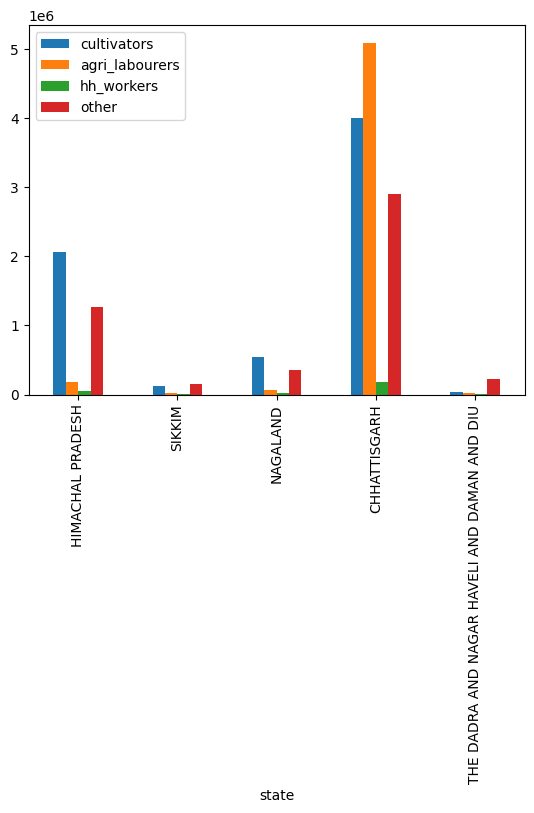

In [28]:
data_to_be_plotted.plot(kind="bar")